In [1]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt

### Gradients for different noise levels

In [2]:
def plot_hists_together_2noiseLevel(ss_grad_diffs_30,ss_grad_diffs_35,sup_grad_diffs,bins,log=True):    
    
    n_sup,bins_sup,_ = plt.hist(sup_grad_diffs,bins=bins, alpha=0.5, label='Sup', color='red')
    n_ss_30,bins_ss_30,_ = plt.hist(ss_grad_diffs_30,bins=bins, alpha=0.5, label='Self-sup 3.0', color='green')
    n_sup_35,bins_sup_35,_ = plt.hist(ss_grad_diffs_35,bins=bins, alpha=0.5, label='Self-sup 3.5', color='blue')
    # Add a legend to the plot
    plt.legend(loc='upper right')
    
    if log:
        plt.xscale('log')

    # Add labels and a title
    plt.xlabel('Normalized Difference')
    plt.ylabel('Frequency')
    plt.title('Histogram of Stochastic Gradients')

    plt.show()
    return n_sup,bins_sup,n_ss_30,bins_ss_30,n_sup_35,bins_sup_35

#### Logarithmix x-axis and logarithmic bin width


Epoch 1:
Stats ss 3.0 grad diffs: mean 29.029, std 111.96, max 4967.0, min 0.31985
Stats ss 3.5 grad diffs: mean 55.368, std 212.75, max 6457.4, min 0.35082
Stats sup grad diffs: mean 13.942, std 50.458, max 2972.5, min 0.20954

Grad diffs larger than 10000 are not considered in histograms
Fraction of grad diffs that remain after cutoff:
ss 3.0: 1.0
ss 3.5: 1.0
sup: 1.0

Stats after cutoff grad diffs larger than 10000
Stats ss 3.0 grad diffs: mean 29.029, std 111.96, max 4967.0, min 0.31985
Stats ss 3.5 grad diffs: mean 55.368, std 212.75, max 6457.4, min 0.35082
Stats sup grad diffs: mean 13.942, std 50.458, max 2972.5, min 0.20954
100
100
6457.4404296875
6457.440429687497


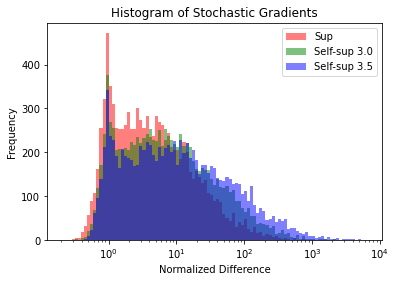

In [4]:
#epochs = [0,1,2]
epochs = [1]
experiment_name = "N992_t10000_sup_VS_ss3035_FixCenter_grad_diff_run1" 

for epoch in epochs:
    with open(f"./{experiment_name}/ss_diff_30_tracks_ep{epoch}.pkl", 'rb') as stream:          
        ss_diff_30_tracks_FixCenter = pickle.load(stream)
    with open(f"./{experiment_name}/sup_diff_tracks_ep{epoch}.pkl", 'rb') as stream:          
        sup_diff_tracks_FixCenter = pickle.load(stream)
    with open(f"./{experiment_name}/ss_diff_35_tracks_ep{epoch}.pkl", 'rb') as stream:          
        ss_diff_35_tracks_FixCenter = pickle.load(stream)

    ss_grad_diffs_30 = ss_diff_30_tracks_FixCenter['divide_by_norm_of_risk_grad'].val
    ss_grad_diffs_35 = ss_diff_35_tracks_FixCenter['divide_by_norm_of_risk_grad'].val
    sup_grad_diffs = sup_diff_tracks_FixCenter['divide_by_norm_of_risk_grad'].val
    ss_grad_diffs_30.sort()
    ss_grad_diffs_35.sort()
    sup_grad_diffs.sort()
    
    print(f"\nEpoch {epoch}:")
    print(f"Stats ss 3.0 grad diffs: mean {np.mean(ss_grad_diffs_30):.5}, std {np.std(ss_grad_diffs_30):.5}, max {np.max(ss_grad_diffs_30):.5}, min {np.min(ss_grad_diffs_30):.5}")
    print(f"Stats ss 3.5 grad diffs: mean {np.mean(ss_grad_diffs_35):.5}, std {np.std(ss_grad_diffs_35):.5}, max {np.max(ss_grad_diffs_35):.5}, min {np.min(ss_grad_diffs_35):.5}")
    print(f"Stats sup grad diffs: mean {np.mean(sup_grad_diffs):.5}, std {np.std(sup_grad_diffs):.5}, max {np.max(sup_grad_diffs):.5}, min {np.min(sup_grad_diffs):.5}")

    cut_off = 1
    max_diff_considered = 10000 
    print(f"\nGrad diffs larger than {max_diff_considered} are not considered in histograms")
    ss_grad_diffs_30_cutoff = list(np.array(ss_grad_diffs_30)[np.array(ss_grad_diffs_30)<=max_diff_considered])
    ss_grad_diffs_35_cutoff = list(np.array(ss_grad_diffs_35)[np.array(ss_grad_diffs_35)<=max_diff_considered])
    sup_grad_diffs_cutoff = list(np.array(sup_grad_diffs)[np.array(sup_grad_diffs)<=max_diff_considered])
    
    print(f"Fraction of grad diffs that remain after cutoff:")
    print(f"ss 3.0: {len(ss_grad_diffs_30_cutoff)/len(ss_grad_diffs_30)}")
    print(f"ss 3.5: {len(ss_grad_diffs_35_cutoff)/len(ss_grad_diffs_35)}")
    print(f"sup: {len(sup_grad_diffs_cutoff)/len(sup_grad_diffs)}")
    ss_grad_diffs_30 = ss_grad_diffs_30_cutoff
    ss_grad_diffs_35 = ss_grad_diffs_35_cutoff
    sup_grad_diffs = sup_grad_diffs_cutoff
    
    print(f"\nStats after cutoff grad diffs larger than {max_diff_considered}")
    print(f"Stats ss 3.0 grad diffs: mean {np.mean(ss_grad_diffs_30):.5}, std {np.std(ss_grad_diffs_30):.5}, max {np.max(ss_grad_diffs_30):.5}, min {np.min(ss_grad_diffs_30):.5}")
    print(f"Stats ss 3.5 grad diffs: mean {np.mean(ss_grad_diffs_35):.5}, std {np.std(ss_grad_diffs_35):.5}, max {np.max(ss_grad_diffs_35):.5}, min {np.min(ss_grad_diffs_35):.5}")
    print(f"Stats sup grad diffs: mean {np.mean(sup_grad_diffs):.5}, std {np.std(sup_grad_diffs):.5}, max {np.max(sup_grad_diffs):.5}, min {np.min(sup_grad_diffs):.5}")
    
    min_all = np.min(ss_grad_diffs_30+sup_grad_diffs+ss_grad_diffs_35)
    max_all = np.max(ss_grad_diffs_30+sup_grad_diffs+ss_grad_diffs_35)
    
    # logarithmically sized bins
    num_bins=100
    bins=np.logspace(np.log10(min_all), np.log10(max_all), num=num_bins, endpoint=True, base=10.0)
    print(num_bins)
    
    print(len(bins))
    print(max_all)
    print(bins[-1])
    
    log=True
    n_sup,bins_sup,n_ss_30,bins_ss_30,n_sup_35,bins_sup_35 = plot_hists_together_2noiseLevel(ss_grad_diffs_30,
                                                                                             ss_grad_diffs_35,
                                                                                             sup_grad_diffs,
                                                                                             bins=bins,
                                                                                             log=log)
    